In [1]:
import numpy as np 
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv', index_col='PassengerId')
test_data = pd.read_csv('test.csv', index_col='PassengerId')

# Shape and preview
print('Train shape:', train_data.shape)
print('Test shape:', test_data.shape)
train_data.head()

Train shape: (8693, 13)
Test shape: (4277, 12)


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [4]:
train_data['Transported'].replace(False, 0, inplace=True)
train_data['Transported'].replace(True, 1, inplace=True)

In [5]:
train_data[['deck','num', 'side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['deck','num', 'side']] = test_data['Cabin'].str.split('/', expand=True)

train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [6]:
sum_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_data['spending'] = train_data[sum_col].sum(axis=1)
test_data['spending'] = test_data[sum_col].sum(axis=1)

In [7]:
train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,spending
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0,G,1499,S,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S,1873.0


In [8]:
test_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side,spending
PassengerId,,,,,,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S,0.0
0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,2832.0
0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S,0.0
0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,7418.0
0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496,S,0.0
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN,1018.0
9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,D,296,P,0.0


/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


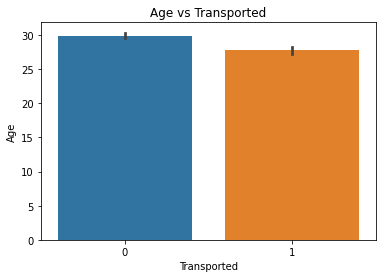

In [9]:
sns.barplot(train_data["Transported"],train_data["Age"])
plt.title("Age vs Transported")
plt.show()

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


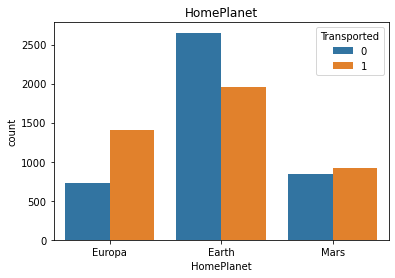

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


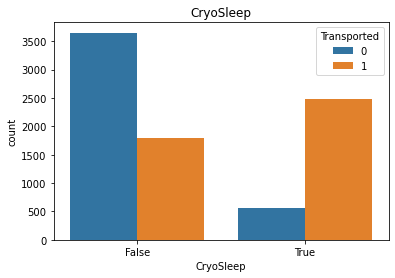

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


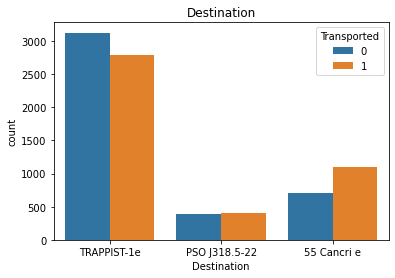

/Users/sumanth/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


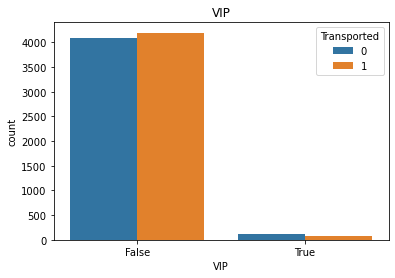

In [10]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in [cols for cols in cat_feats if cols not in ['Cabin']]:
    sns.countplot(col,hue = 'Transported',data = train_data)
    plt.title(col)
    plt.show()

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
 11  deck          8494 non-null   object 
 12  num           8494 non-null   object 
 13  side          8494 non-null   object 
 14  spending      8693 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
train_data.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck            199
num             199
side            199
spending          0
dtype: int64

In [13]:
test_data.isna().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
deck            100
num             100
side            100
spending          0
dtype: int64

In [14]:
null_val_col = train_data.isnull().sum().sort_values(ascending=False)
null_val_col = list(null_val_col[null_val_col>1].index)
null_val_col

['CryoSleep',
 'ShoppingMall',
 'VIP',
 'HomePlanet',
 'deck',
 'num',
 'side',
 'VRDeck',
 'FoodCourt',
 'Spa',
 'Destination',
 'RoomService',
 'Age']

In [15]:
object_val_col = [col for col in train_data.columns if train_data[col].dtype == 'object' or train_data[col].dtype == 'category']
numeric = [col for col in train_data.columns if train_data[col].dtype == 'float64']

print(f'Object cols -- {object_val_col}')
print(f'Numeric cols -- {numeric}')

Object cols -- ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'num', 'side']
Numeric cols -- ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'spending']


In [16]:
train_data[object_val_col] = train_data[object_val_col].astype('category')
test_data[object_val_col] = test_data[object_val_col].astype('category')

In [18]:
oc = OrdinalEncoder()

df_for_encode = pd.concat([train_data, test_data])

df_for_encode[object_val_col] = df_for_encode[object_val_col].astype('category')

df_for_encode[object_val_col] = oc.fit_transform(df_for_encode[object_val_col])

del train_data, test_data

train = df_for_encode.iloc[:8693, :]
test = df_for_encode.iloc[8693: , :]

del df_for_encode

test.drop('Transported', inplace=True, axis=1)

In [21]:
test


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side,spending
PassengerId,,,,,,,,,,,,,,
0013_01,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1117.0,1.0,0.0
0018_01,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,5.0,1228.0,1.0,2832.0
0019_01,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
0021_01,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2.0,1.0,1.0,7418.0
0023_01,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,5.0,1339.0,1.0,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0.0,1.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,553.0,1.0,0.0
9269_01,0.0,0.0,2.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN,1018.0
9271_01,2.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1113.0,0.0,0.0


In [23]:
ct = ColumnTransformer([("imp", SimpleImputer(strategy='mean'), null_val_col)])
    
train[null_val_col] = ct.fit_transform(train[null_val_col])
test[null_val_col] = ct.fit_transform(test[null_val_col])

In [24]:
X = train.copy()
y = X.pop('Transported')

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [25]:
model = RandomForestClassifier()
model.fit(X_train , y_train)
predict = model.predict(X_test)
acc_rf = round(model.score(X_train, y_train) * 100, 2)
acc_rf

99.97

In [26]:
print(f'The accuracy score of {str(model)} is {float(accuracy_score(y_test, predict))}')        

The accuracy score of RandomForestClassifier() is 0.8012879484820608


In [27]:
model = AdaBoostClassifier()
model.fit(X_train , y_train)
predict = model.predict(X_test)
acc_ada = round(model.score(X_train, y_train) * 100, 2)
acc_ada

79.43

In [28]:
print(f'The accuracy score of {str(model)} is {float(accuracy_score(y_test, predict))}')        

The accuracy score of AdaBoostClassifier() is 0.7980680772769089


In [29]:
model = XGBClassifier()
model.fit(X_train , y_train)
predict = model.predict(X_test)
acc_xgb = round(model.score(X_train, y_train) * 100, 2)
acc_xgb

94.16

In [30]:
print(f'The accuracy score of {str(model)} is {float(accuracy_score(y_test, predict))}')        

The accuracy score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) is 0.7948482060717571


In [31]:
model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)
predict = model.predict(X_test)
acc_cat_boost = round(model.score(X_train, y_train) * 100, 2)
acc_cat_boost

88.46

In [32]:
print(f'The accuracy score of {str(model)} is {float(accuracy_score(y_test, predict))}')        

The accuracy score of <catboost.core.CatBoostClassifier object at 0x7fead170d580> is 0.8054277828886844


In [33]:
model_fs = CatBoostClassifier(verbose=False)
sf = SequentialFeatureSelector(model_fs, scoring='accuracy', direction = 'backward')
sf.fit(X,y)

SequentialFeatureSelector(direction='backward',
                          estimator=<catboost.core.CatBoostClassifier object at 0x7fead1caa160>,
                          scoring='accuracy')

In [34]:
best_features = list(sf.get_feature_names_out())
best_features

['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'deck', 'side', 'spending']

In [35]:
model = CatBoostClassifier(verbose=False, eval_metric='Accuracy')
model.fit(X[best_features], y)
prediction = model.predict(test[best_features])

In [36]:
final = pd.DataFrame()
final.index = test.index
final['Transported'] = prediction
final['Transported'].replace(0, False, inplace=True)
final['Transported'].replace(1, True, inplace=True)
final

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [37]:
final.to_csv('submission.csv')